In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time

# from sklearn.decomposition import PCA

In [2]:
data_path = "corrtestdata.csv"
original_data = data = pd.read_csv(data_path)
data

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,1,2,0.714286,10.5,1,5,0.454545,0.000000,0.199546
1,rat2,251,182.0,1,0.010440,0.004396,0.008791,4,0.023077,0.000742,3,2,0.666667,19.5,3,3,0.302198,1.648659,0.478632
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,2,1,0.904762,10.5,2,8,0.653333,0.000000,0.340136
3,rat4,261,45.0,2,0.047333,0.005556,0.105111,-1,0.293333,0.002178,1,1,0.869565,11.5,4,2,0.260000,2.653242,0.340265
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,1,1,0.720000,12.5,2,8,0.500000,0.000000,0.275200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,1,1,0.760870,23.0,2,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,1,1,0.714286,24.5,2,8,0.380252,1.512927,0.793003
560,rat578,230,459.0,1,0.085251,0.003682,0.016144,2,0.001089,0.001218,1,1,0.816327,24.5,2,8,0.517429,0.405465,0.764681
561,rat120,166,253.0,2,0.035178,3.968379,0.005138,-1,0.013043,0.000794,4,2,0.727273,22.0,3,3,0.189723,1.458615,0.522727


In [7]:
def check_strong(x):
    if np.abs(x)>0.4:
        return x
    else:
        return ""

def get_correlation(data):
    p_corr=data.corr(method='pearson')
    p_corr=p_corr.round(2)
    p_corr
    corr_strong=p_corr.applymap(check_strong)
    return corr_strong
    

In [8]:
corr1=get_correlation(data)
corr1

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,,,,,,,0.45,,,0.7,,,0.44,
weight,,1,,,,,,,,,,,0.88,,,-0.41,0.53,0.88
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,,,
heartind,,,,,1,,,,,,,,,,,,,
appind,,,,,,1,,0.43,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.43,,1,,,0.49,,,0.57,,,0.68,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


# Task 1
a) strong correlations are in the table above

In [10]:
to_drop=data.loc[(data["id"]=="rat2")|(data["id"]=="rat53")|(data["id"]=="rat120")|(data["id"]=="rat434")].index
data.loc[to_drop]

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
1,rat2,251,182.0,1,0.010440,0.004396,0.008791,4,0.023077,0.000742,3,2,0.666667,19.5,3,3,0.302198,1.648659,0.478632
48,rat53,81,104.4,1,0.061303,0.015326,0.009579,4,0.000000,0.002835,2,2,0.666667,15.0,1,5,0.493295,0.000000,0.464000
561,rat120,166,253.0,2,0.035178,3.968379,0.005138,-1,0.013043,0.000794,4,2,0.727273,22.0,3,3,0.189723,1.458615,0.522727
562,rat434,258,55.0,1,0.309273,0.016364,0.075636,4,0.004545,0.003236,1,1,0.829268,20.5,2,8,0.214545,0.223144,0.130874


In [11]:
# remove the outliers
data_dropb = data.drop(to_drop)
data_dropb

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,4,0.000000,0.001864,1,2,0.714286,10.5,1,5,0.454545,0.000000,0.199546
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,4,0.000000,0.001467,2,1,0.904762,10.5,2,8,0.653333,0.000000,0.340136
3,rat4,261,45.0,2,0.047333,0.005556,0.105111,-1,0.293333,0.002178,1,1,0.869565,11.5,4,2,0.260000,2.653242,0.340265
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,4,0.000000,0.001884,1,1,0.720000,12.5,2,8,0.500000,0.000000,0.275200
5,rat6,169,40.0,1,0.057250,0.006500,0.014000,4,0.000000,0.002925,2,1,0.826087,11.5,2,7,0.575000,0.000000,0.302457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,3,0.010656,0.002602,1,1,0.808163,24.5,2,7,0.372172,1.742219,0.736360
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,4,0.004976,0.001035,1,1,0.777273,22.0,2,6,0.381090,1.064711,0.788843
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,1,0.004087,0.001337,1,1,0.760870,23.0,2,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,2,0.007437,0.001592,1,1,0.714286,24.5,2,8,0.380252,1.512927,0.793003


In [12]:
corr2=get_correlation(data_dropb)
corr2

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,-0.45,,,,,,0.45,,,0.7,,,0.44,
weight,,1,,,-0.49,,,,,,,,0.88,,,-0.42,0.53,0.88
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,0.46,-0.48,
heartind,-0.45,-0.49,,,1,,,,,,,,-0.42,-0.47,-0.41,,-0.55,-0.55
appind,,,,,,1,,0.47,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.47,,1,,,0.49,,,0.57,,,0.68,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


## b) after removing outliers, there is a strong correlation between liveind and ADWBind. the data we deleted influenced the computation of correlation, because some of their number in liverind or heartind are apprantly unreasonable. they either took up too much or too litter percent of whole body weights, which is impossible  

In [13]:
freezer_index=data_dropb.loc[data_dropb["day"]==400].index


In [14]:
data_dropb.loc[freezer_index,"day"]=0
data_dropb.loc[freezer_index,"year"]=-1

In [15]:
corr3=get_correlation(data_dropb)
corr3

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,,,,,,,-0.53,,,,,,,
weight,,1,,,-0.49,,,,,,,,0.88,,,-0.42,0.53,0.88
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,0.46,-0.48,
heartind,,-0.49,,,1,,,,,,,,-0.42,-0.47,,,-0.55,-0.55
appind,,,,,,1,,0.47,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.47,,1,,,0.49,,,0.57,-0.45,,0.68,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


## c) the correlation of day and years with other features are all vanished.  I think day and year don't have the correlations with other featurs, these time related feature can't maintian obvious connection between the actual physiological characteristics.

In [17]:
data_dropb=data_dropb.drop(freezer_index)

corr4=get_correlation(data_dropb)
corr4

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,,,,,,,,,,0.52,,,,
weight,,1,,,-0.44,,,,,,,,0.89,,,,0.49,0.87
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,,,
heartind,,-0.44,,,1,,,,,,,,-0.42,,,,,-0.47
appind,,,,,,1,,0.48,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.48,,1,,,,,,,,,0.51,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


# e) changing some categorical features
# f) which features are realiable?

In [23]:
data_dropb["femstate"]=data_dropb["femstate"]+10
data_dropb["place"]=data_dropb["place"]+5

,id,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
0,rat1,67,22.0,1,0.036364,0.005091,0.013636,14,0.000000,0.001864,1,2,0.714286,10.5,31,5,0.454545,0.000000,0.199546
2,rat3,230,37.5,1,0.051200,0.006133,0.020800,14,0.000000,0.001467,2,1,0.904762,10.5,32,8,0.653333,0.000000,0.340136
3,rat4,261,45.0,2,0.047333,0.005556,0.105111,9,0.293333,0.002178,1,1,0.869565,11.5,34,2,0.260000,2.653242,0.340265
4,rat5,262,43.0,1,0.052558,0.005349,0.021628,14,0.000000,0.001884,1,1,0.720000,12.5,32,8,0.500000,0.000000,0.275200
5,rat6,169,40.0,1,0.057250,0.006500,0.014000,14,0.000000,0.002925,2,1,0.826087,11.5,32,7,0.575000,0.000000,0.302457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,rat574,127,442.0,1,0.067738,0.003507,0.013552,13,0.010656,0.002602,1,1,0.808163,24.5,32,7,0.372172,1.742219,0.736360
557,rat575,269,381.8,1,0.078575,0.003667,0.014667,14,0.004976,0.001035,1,1,0.777273,22.0,32,6,0.381090,1.064711,0.788843
558,rat576,169,416.0,1,0.079303,0.003918,0.014760,11,0.004087,0.001337,1,1,0.760870,23.0,32,7,0.469952,0.993252,0.786389
559,rat577,244,476.0,1,0.080693,0.004286,0.008803,12,0.007437,0.001592,1,1,0.714286,24.5,32,8,0.380252,1.512927,0.793003


In [24]:
corr4=get_correlation(data_dropb)
corr4

,day,weight,gender,liverind,heartind,appind,femstate,gonfatind,batind,sulcer,kmethod,tailind,blength,place,year,ADWBind,gonind,BMI
day,1,,,,,,,,,,,,,0.52,,,,
weight,,1,,,-0.44,,,,,,,,0.89,,,,0.49,0.87
gender,,,1,,,,-0.89,,,,,,,,,,,
liverind,,,,1,,,,,,,,,,,,,,
heartind,,-0.44,,,1,,,,,,,,-0.42,,,,,-0.47
appind,,,,,,1,,0.48,,,,,,,,,,
femstate,,,-0.89,,,,1,,,,,,,,,,,
gonfatind,,,,,,0.48,,1,,,,,,,,,0.51,
batind,,,,,,,,,1,,,,,,,,,
sulcer,,,,,,,,,,1,,,,,,,,


# task 3

In [22]:
def zeroMean(dataMat):
    meanVal=np.mean(dataMat, axis=0)
    newData=dataMat-meanVal
    return newData,meanVal

def pca(dataMat,n):
    newData,meanVal=zeroMean(dataMat)
    # print(newData)
    covMat=np.cov(newData, rowvar=0)
    print(covMat)
    eigvals,eigVects=np.linalg.eig(np.mat(covMat))
    eigValIndice=np.argsort(eigvals)
    # print(eigValIndice)
    n_eigvalIndice=eigValIndice[ -1:-(n+1):-1] # pick n values from last to start
    print(n_eigvalIndice)
    
    # choose the smallest one
    # n_eigvalIndice=1  # 1 is the index of the smallest eigenvalue
    
    n_eigvect=eigVects[ :,n_eigvalIndice]
    print(n_eigvect)
    lowDDataMat=newData*n_eigvect
    reconMat=( lowDDataMat*n_eigvect.T)+meanVal
    return eigvals,eigVects,lowDDataMat ,reconMat


In [23]:
old_matrix=np.array([[0,1],[-1/2,3/2],[3/2,5/2],[1,3]])

In [26]:
a,b,c,new_matrix=pca(old_matrix,2)


[[0.83333333 0.66666667]
 [0.66666667 0.83333333]]
[0 1]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [15]:
b

matrix([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]])

# a is eigenvalue

In [49]:
_,_,c,new_matrix=pca(old_matrix,2)
c   # using largest

[[0.83333333 0.66666667]
 [0.66666667 0.83333333]]
[0 1]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


matrix([[-1.06066017, -0.35355339],
        [-1.06066017,  0.35355339],
        [ 1.06066017, -0.35355339],
        [ 1.06066017,  0.35355339]])

In [47]:
onedim

matrix([[-1.06066017],
        [-1.06066017],
        [ 1.06066017],
        [ 1.06066017]])

In [45]:
new_matrix

matrix([[ 5.55111512e-17,  1.00000000e+00],
        [-5.00000000e-01,  1.50000000e+00],
        [ 1.50000000e+00,  2.50000000e+00],
        [ 1.00000000e+00,  3.00000000e+00]])

In [33]:
_,_,c,new_matrix=pca(old_matrix,1)
c   #using smallest

matrix([[-0.35355339],
        [ 0.35355339],
        [-0.35355339],
        [ 0.35355339]])

# C Euclidean Distance --their distance remains same wheather it's 1D or 2D

In [10]:
def get_dis_pairs(M):
    lens=M.shape[0]
    result=np.zeros((lens,lens))
    for i in range(lens):
        j=i+1
        while(j<lens):
            result[i][j]=np.linalg.norm(M[i]-M[j])
            j=j+1
    return result


In [50]:
re1=get_dis_pairs(onedim)  # 1-D
re2=get_dis_pairs(new_matrix) #2-D
re3=get_dis_pairs(old_matrix)

print(re3)
print(re1)
print(re2)

print(c)
print(new_matrix)

[[0.         0.70710678 2.12132034 2.23606798]
 [0.         0.         2.23606798 2.12132034]
 [0.         0.         0.         0.70710678]
 [0.         0.         0.         0.        ]]
[[0.         0.         2.12132034 2.12132034]
 [0.         0.         2.12132034 2.12132034]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
[[0.         0.70710678 2.12132034 2.23606798]
 [0.         0.         2.23606798 2.12132034]
 [0.         0.         0.         0.70710678]
 [0.         0.         0.         0.        ]]
[[-1.06066017 -0.35355339]
 [-1.06066017  0.35355339]
 [ 1.06066017 -0.35355339]
 [ 1.06066017  0.35355339]]
[[ 5.55111512e-17  1.00000000e+00]
 [-5.00000000e-01  1.50000000e+00]
 [ 1.50000000e+00  2.50000000e+00]
 [ 1.00000000e+00  3.00000000e+00]]


# D  the two datasets coverted into 1-d form, and lies on the same places in the plot. they are similar

In [42]:
matrixD=np.array([[np.sqrt(1/2),np.sqrt(1/2)],[np.sqrt(1/2),2*np.sqrt(1/2)],[4*np.sqrt(1/2),np.sqrt(1/2)],[4*np.sqrt(1/2),2*np.sqrt(1/2)]])
matrixD

array([[0.70710678, 0.70710678],
       [0.70710678, 1.41421356],
       [2.82842712, 0.70710678],
       [2.82842712, 1.41421356]])

In [43]:
a,_,lowM,newM=pca(matrixD,1)

print(a)
print(lowM)
print(newM)

[1.5        0.16666667]
[[-1.06066017]
 [-1.06066017]
 [ 1.06066017]
 [ 1.06066017]]
[[0.70710678 1.06066017]
 [0.70710678 1.06066017]
 [2.82842712 1.06066017]
 [2.82842712 1.06066017]]


In [43]:
x=np.array(lowM)
y=len(lowM)*[0]
print(x,y)

[[-1.06066017]
 [-1.06066017]
 [ 1.06066017]
 [ 1.06066017]] [0, 0, 0, 0]


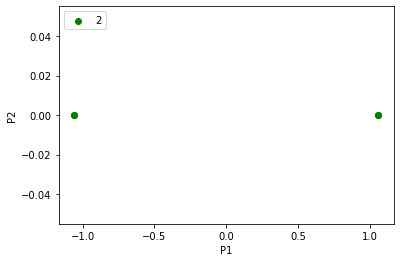

In [52]:
plt.scatter(np.array(lowM),len(lowM)*[0],label="New Dataset",c='g')


plt.xlabel("P1")
plt.ylabel("P2")
plt.legend(loc='upper left')
plt.show()

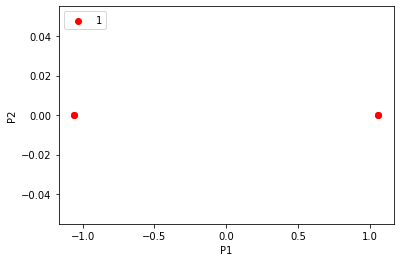

In [53]:
plt.scatter(np.array(c),len(c)*[0],label="Old Dataset",c='r')
plt.xlabel("P1")
plt.ylabel("P2")
plt.legend(loc='upper left')
plt.show()

# Task4 Cows

In [27]:
data={
    "name":["Clover","Sunny","Rose","Daisy","Strawberry","Molly"],
    "race":["Holstein","Ayrshir","Holstein","Ayrshir","Finncattle","Ayrshir"],
    "age" :[2,2,5,4,7,8],
    "milk":[20,10,15,25,35,45],
    "character":["lively","kind","calm","calm","calm","kind"],
    "music":["rock","rock","country","classical","classical","country"]
}

cows=pd.DataFrame(data)

cows


,name,race,age,milk,character,music
0,Clover,Holstein,2,20,lively,rock
1,Sunny,Ayrshir,2,10,kind,rock
2,Rose,Holstein,5,15,calm,country
3,Daisy,Ayrshir,4,25,calm,classical
4,Strawberry,Finncattle,7,35,calm,classical
5,Molly,Ayrshir,8,45,kind,country


In [28]:
cows["age_scaler"]=(cows["age"]-cows["age"].min())/(cows["age"].max()-cows["age"].min())

cows["milk_scaler"]=(cows["milk"]-cows["milk"].min())/(cows["milk"].max()-cows["milk"].min())

cows

,name,race,age,milk,character,music,age_scaler,milk_scaler
0,Clover,Holstein,2,20,lively,rock,0.000000,0.285714
1,Sunny,Ayrshir,2,10,kind,rock,0.000000,0.000000
2,Rose,Holstein,5,15,calm,country,0.500000,0.142857
3,Daisy,Ayrshir,4,25,calm,classical,0.333333,0.428571
4,Strawberry,Finncattle,7,35,calm,classical,0.833333,0.714286
5,Molly,Ayrshir,8,45,kind,country,1.000000,1.000000


In [29]:
ndata=np.array(cows[["age_scaler","milk_scaler"]])

ndata

array([[0.        , 0.28571429],
       [0.        , 0.        ],
       [0.5       , 0.14285714],
       [0.33333333, 0.42857143],
       [0.83333333, 0.71428571],
       [1.        , 1.        ]])

In [51]:
# Compute numerical similarity
def get_numsim_M(ndata):
    lens=len(ndata)

    SM=np.zeros((lens,lens))

    for i in range(lens):
        j=i+1
        while j <lens:
            tep=(ndata[i][0]-ndata[j][0])**2+(ndata[i][1]-ndata[j][1])**2
            tep=np.sqrt(tep)
            SM[i][j]=SM[j][i]=tep
            j=j+1
    return SM.round(4)

re=get_numsim_M(ndata)

re     
    

array([[0.    , 0.2857, 0.52  , 0.3627, 0.9371, 1.2289],
       [0.2857, 0.    , 0.52  , 0.5429, 1.0976, 1.4142],
       [0.52  , 0.52  , 0.    , 0.3308, 0.6615, 0.9923],
       [0.3627, 0.5429, 0.3308, 0.    , 0.5759, 0.8781],
       [0.9371, 1.0976, 0.6615, 0.5759, 0.    , 0.3308],
       [1.2289, 1.4142, 0.9923, 0.8781, 0.3308, 0.    ]])

# Similarity for Categories

In [31]:
dic={"Ayrshir": 1/2,"Holstein": 1/3,"Finncattle": 1/6,
        "lively":1/6,"kind":1/3,"calm":1/2,
        "rock":1/3,"country":1/3,"classical":1/3}

In [32]:
ccols=["race","character","music"]
cdata=np.array(cows[ccols])
cdata

array([['Holstein', 'lively', 'rock'],
       ['Ayrshir', 'kind', 'rock'],
       ['Holstein', 'calm', 'country'],
       ['Ayrshir', 'calm', 'classical'],
       ['Finncattle', 'calm', 'classical'],
       ['Ayrshir', 'kind', 'country']], dtype=object)

In [33]:
def get_catsim_M(cdata,dic):
    lens,f_num=cdata.shape

    CM=np.zeros((lens,lens))

    for i in range(lens):
        j=i+1
        while j <lens:
            tep=0
            for x in range(f_num):
                if cdata[i][x]==cdata[j][x]:
                    tep=tep+1-dic[cdata[i][x]]**2
            CM[i][j]=CM[j][i]=1-tep/f_num
            j=j+1
    return CM.round(4)

re=get_catsim_M(cdata,dic)

re

array([[0.    , 0.7037, 0.7037, 1.    , 1.    , 1.    ],
       [0.7037, 0.    , 1.    , 0.75  , 1.    , 0.4537],
       [0.7037, 1.    , 0.    , 0.75  , 0.75  , 0.7037],
       [1.    , 0.75  , 0.75  , 0.    , 0.4537, 0.75  ],
       [1.    , 1.    , 0.75  , 0.4537, 0.    , 1.    ],
       [1.    , 0.4537, 0.7037, 0.75  , 1.    , 0.    ]])

# Mix Similarity of number and category

In [52]:
numsim=get_numsim_M(ndata)
catsim=get_catsim_M(cdata,dic)

a=2/5

mixSim=a*numsim/np.std(numsim)+(1-a)*catsim/np.std(catsim)
mixSim=mixSim.round(3)
mixSim

array([[0.   , 1.507, 1.735, 2.1  , 2.658, 2.941],
       [1.507, 0.   , 2.253, 1.838, 2.814, 2.167],
       [1.735, 2.253, 0.   , 1.632, 1.953, 2.194],
       [2.1  , 1.838, 1.632, 0.   , 1.352, 2.164],
       [2.658, 2.814, 1.953, 1.352, 0.   , 2.069],
       [2.941, 2.167, 2.194, 2.164, 2.069, 0.   ]])

In [35]:
def show_hist(data,bins):
    x =[]
    for i in range(6):
        x.extend(data[i][i+1:6])
    # print(x)
    plt.hist(x, bins=bins)
    plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
    plt.show()

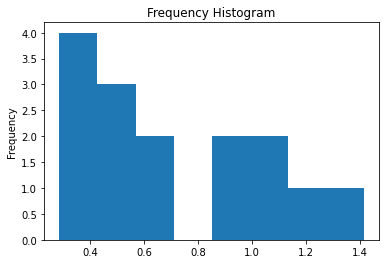

In [62]:
# numsim
show_hist(numsim,8)

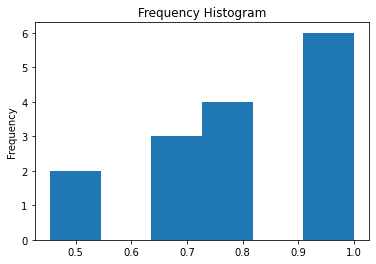

In [70]:
# catsisim
show_hist(catsim,6)

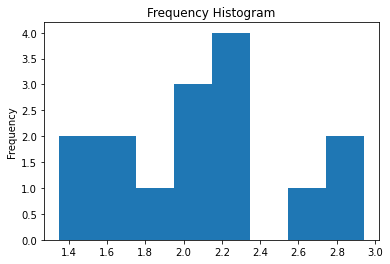

In [76]:
#mixsim

show_hist(mixSim,8)